In [7]:
from Gridworld import Gridworld
game = Gridworld(size=4, mode='static')

In [8]:
game.display()

array([['+', '-', ' ', 'P'],
       [' ', 'W', ' ', ' '],
       [' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ']], dtype='<U2')

## Developing Q learning Network

In [9]:
import numpy as np
import torch
import torch.nn as nn
from Gridworld import Gridworld
from IPython.display import clear_output
import random
from matplotlib import pylab as plt

l1 = 64
l2 = 150
l3 = 100
l4 = 4

1 We set up a for loop for the number of epochs.
2 In the loop, we set up a while loop (while the game is in progress).
3 We run the Q-network forward.
4 We’re using an epsilon-greedy implementation, so at time t with probability ε
we will choose a random action. With probability 1 – ε, we will choose the action
associated with the highest Q value from our neural network.
5 Take action a as determined in the preceding step, and observe the new state s′
and reward rt+1.
6 Run the network forward using s′. Store the highest Q value, which we’ll call
max Q.
7 Our target value for training the network is rt+1 + γ *maxQA(St+1), where γ
(gamma) is a parameter between 0 and 1. If after taking action at the game is
over, there is no legitimate st+1, so γ *maxQA(St+1) is not valid and we can set it to
0. The target becomes just rt+1.
8 Given that we have four outputs and we only want to update (i.e., train) the output associated with the action we just took, our target output vector is the same
as the output vector from the first run, except we change the one output associated with our action to the result we computed using the Q-learning formula.
9 Train the model on this one sample. Then repeat steps 2–9.

In [10]:
model=nn.Sequential(
    nn.Linear(l1, l2),
    nn.ReLU(),
    nn.Linear(l2, l3),
    nn.ReLU(),
    nn.Linear(l3, l4)
)

loss_fn=torch.nn.MSELoss()
optim=torch.optim.Adam(model.parameters(), lr=1e-3)
gamma=0.9
epsilon=1.0

action_set={
    0: 'u',
    1: 'd',
    2: 'l',
    3: 'r'
}

#@ Training Loop:
epochs=1000
losses=[]
for i in range(epochs):
  game=Gridworld(size=4, mode='static') #creating a new game
  state_=game.board.render_np().reshape(1, 64) + np.random.rand(1, 64)/10.0
  state1=torch.from_numpy(state_).float() #conversion from np to torch
  status=1 #to track if game is in progress or not

  while(status==1):
    qval=model(state1)
    qval_=qval.data.numpy()

    #using epsilon greedy algorithm:
    if (random.random()<epsilon):
      action_=np.random.randint(0, 4)
    else:
      action_=np.argmax(qval_)

    #conversion of numerical values into char which gridworld expects:
    action=action_set[action_]
    game.makeMove(action) #taking action in the grid

    #@ game state changes:
    state2_=game.board.render_np().reshape(1, 64) + np.random.rand(1, 64)/10.0
    state2=torch.from_numpy(state2_).float()
    reward=game.reward()

    #@ Optimization:
    with torch.no_grad():
      newQ=model(state2.reshape(1, 64))
    maxQ=torch.max(newQ)

    if reward==-1:
      Y=reward + (gamma * maxQ)
    else:
      Y=reward

    Y=torch.Tensor([Y]).detach()
    X=qval.squeeze()[action_]
    loss=loss_fn(X, Y)
    print(i, loss.item())
    clear_output(wait=True)
    optim.zero_grad()
    loss.backward()
    losses.append(loss.item())
    optim.step()
    state1=state2
    if reward!=-1:
      status=0
  if epsilon> 0.1:
    epsilon-=1/epochs








999 0.0012971169780939817


Text(0, 0.5, 'Loss')

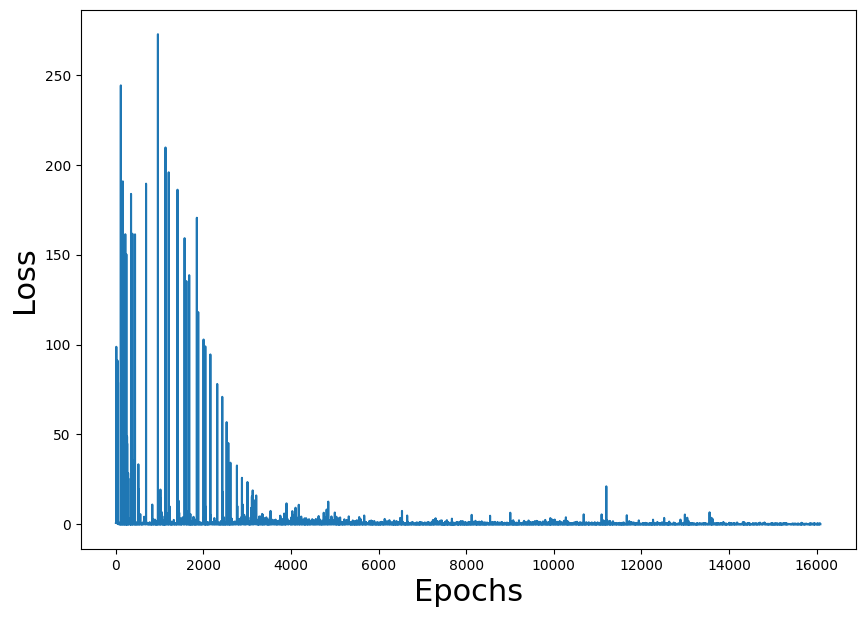

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(losses)
plt.xlabel("Epochs", fontsize=22)
plt.ylabel("Loss", fontsize=22)